# HR ATTRIBUTION

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# 1.) Import, split data into X/y, plot y data as bar charts, turn X categorical variables binary and tts.

In [2]:
df = pd.read_csv("HR_Analytics.csv")
df # Everytime company loses employees, it costs a lot of money - do no want a "YES" in attrition 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
y = df[["Attrition"]].copy()
X = df.drop("Attrition", axis = 1)
y["Attrition"] = [1 if i == "Yes" else 0 for i in y["Attrition"]]
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


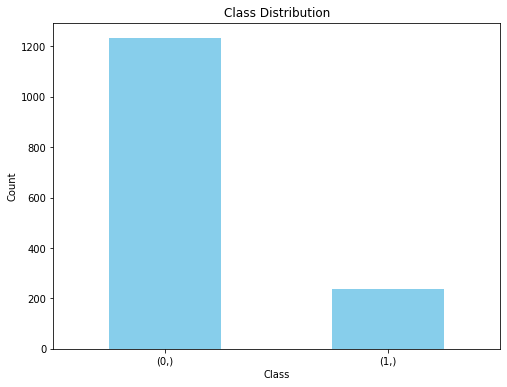

In [4]:
# Im-balanced Data
class_counts = y.value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation = 0)  # Remove rotation of x-axis labels
plt.show()
%config BackendInline.figure_format = 'retina'

In [5]:
# Step 1: Identify string columns
string_columns = X.columns[X.dtypes == 'object']

# Step 2: Convert string columns to categorical
for col in string_columns:
    X[col] = pd.Categorical(X[col])

# Step 3: Create dummy columns
X = pd.get_dummies(X, columns = string_columns, prefix = string_columns, drop_first = True)
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,True,False,False,False,False,False,False,True,False,False
1466,39,613,6,1,1,2062,4,42,2,3,...,False,False,False,False,False,False,False,True,False,False
1467,27,155,4,3,1,2064,2,87,4,2,...,False,False,True,False,False,False,False,True,False,True
1468,49,1023,2,3,1,2065,4,63,2,2,...,False,False,False,False,False,True,False,True,False,False


In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,
y, test_size = 0.20, random_state = 42)

# 2.) Using the default Decision Tree. What is the In/Out of Sample accuracy?

In [7]:
# Overfitting Model Complexity
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  1.0
OUT OF SAMPLE ACCURACY :  0.78


# 3.) Run a grid search cross validation using F1 score to find the best metrics. What is the In and Out of Sample now?

In [8]:
# Define the hyperparameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),  # Range of max_depth values to try # To STOP the model earlier
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_classifier = DecisionTreeClassifier(random_state=42)

scoring = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scoring, cv=5)

grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1-Score: 0.8214764475510983


In [9]:
clf = tree.DecisionTreeClassifier(**best_params, random_state =42) #** To unpack dicotionary
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2)) # Model complexity went down, showing in higher Out-of-Sample accuracy

IN SAMPLE ACCURACY :  0.91
OUT OF SAMPLE ACCURACY :  0.83


# 4.) Plot 

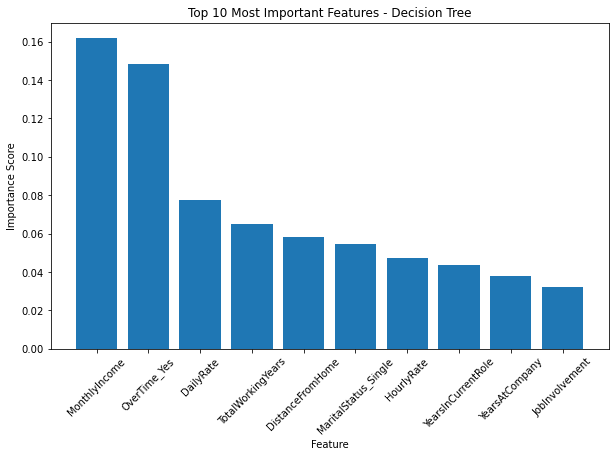

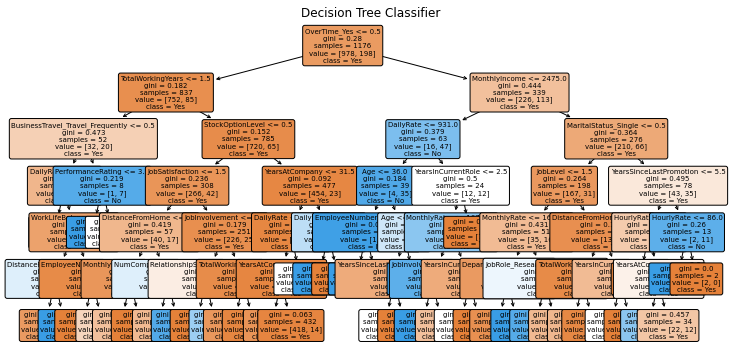

In [78]:
# Make predictions on the test data
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

feature_importance = clf.feature_importances_

# Sort features by importance and select the top 10
top_n = 10
top_feature_indices = np.argsort(feature_importance)[::-1][:top_n]
top_feature_names = X.columns[top_feature_indices]
top_feature_importance = feature_importance[top_feature_indices]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 10 Most Important Features - Decision Tree')
plt.xticks(rotation=45)
plt.show()

# Plot the Decision Tree for better visualization of the selected features
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Yes", "No"], rounded=True, fontsize=7)
plt.title('Decision Tree Classifier')
plt.show()

# 5.) Looking at the graphs. what would be your suggestions to try to improve customer retention? What additional information would you need for a better plan. Calculate/Plot anything you think would assist in your assessment.

Answer: The decision tree shows the top ten most importance features to consider. With regards to this, we should either consider "MonthlyIncome" and/or "WorkingOverTime" to cater improvement in retention. On the below, we verify to see if OverTime really hurts or benefits employee retention through calculating correlation. It explicitly shows from the correlation matrix that increase in OverTime induces higher employee retention rates.

In [13]:
from scipy.stats import pearsonr

In [15]:
# To see correlation if OverTime really hurts Retention?
def calculate_correlation(X, feature_name, y):
    feature = X[feature_name]
    
    coef, _ = pearsonr(feature, y)
    return(coef)

In [18]:
# Result: Increase in Overtime leads to retrition 
np.corrcoef(np.array(X["OverTime_Yes"]), np.array(y["Attrition"]))

array([[1.        , 0.24611799],
       [0.24611799, 1.        ]])

# 6.) Using the Training Data, if they made everyone work overtime or made no one work over time. What would have been the expected difference in Attrition?

In [10]:
x_train_experiment = x_train.copy()
x_train_experiment["OverTime_Yes"] = 0.
y_pred = clf.predict(x_train)
y_pred_experiment = clf.predict(x_train_experiment)
diff = sum(y_pred - y_pred_experiment)
print("The expected difference between allowing overtime and no overtime at all results in higher number of employees (lower attrition) by", diff)

The expected difference between allowing overtime and no overtime at all results in higher number of employees (lower attrition) by 59


# 7.) If they company loses an employee, there is a cost to train a new employee for a role ~2.8 * their monthly income.
# To make someone not work overtime costs the company 2K per person.
# Is it profitable for the company to remove overtime? If so/not by how much? 
# What do you suggest to maximize company profits?

In [25]:
x_train_experiment["Y"] = y_pred
x_train_experiment["Y_exp"] = y_pred_experiment
x_train_experiment["RetChange"] = x_train_experiment["Y_exp"] - x_train_experiment["Y"]
sav = sum(-2.8* x_train_experiment["RetChange"] * x_train_experiment["MonthlyIncome"])
cost = len(x_train[x_train["OverTime_Yes"] == 1]) * 2000

In [26]:
# As a result, keep people working over time: 
sav - cost

-117593.99999999977

Answer: No, it isn't - Removing over time will cost the company in the amount of $117,593 by encouraging people to quit and incurring a traing costs of new employees to fill in the respective roles.

# 8.) Use your model and get the expected change in retention for raising and lowering peoples income. Plot the outcome of the experiment. Comment on the outcome of the experiment and your suggestions to maximize profit.

In [33]:
raise_amount = 100 

In [45]:
profits = []
for raise_amount in range(-1000, 1000, 100):
    x_train_experiment = x_train.copy()
    x_train_experiment["MonthlyIncome"] = x_train_experiment["MonthlyIncome"] + raise_amount

    y_pred = clf.predict(x_train)
    y_pred_experiment = clf.predict(x_train_experiment)

    diff = sum(y_pred - y_pred_experiment)
    print("Change in attrition", diff)
    x_train_experiment["Y"] = y_pred
    x_train_experiment["Y_exp"] = y_pred_experiment
    x_train_experiment["RetChange"] = x_train_experiment["Y_exp"] - x_train_experiment["Y"]

    sav = sum(-2.8* x_train_experiment["RetChange"] * x_train_experiment["MonthlyIncome"])
    cost = len(x_train) * raise_amount

    print("Profit, ", sav-cost)
    profits.append(sav - cost)

Change in attrition -16
Profit,  1087584.4
Change in attrition -14
Profit,  979524.0
Change in attrition -13
Profit,  864992.8
Change in attrition -12
Profit,  750738.8
Change in attrition -12
Profit,  629778.8
Change in attrition -9
Profit,  530138.0
Change in attrition -7
Profit,  424200.0
Change in attrition -4
Profit,  326096.4
Change in attrition -1
Profit,  228440.8
Change in attrition -1
Profit,  110714.8
Change in attrition 0
Profit,  0.0
Change in attrition 6
Profit,  -75328.40000000001
Change in attrition 15
Profit,  -127503.60000000002
Change in attrition 15
Profit,  -240914.8
Change in attrition 21
Profit,  -311586.80000000005
Change in attrition 22
Profit,  -416449.6000000001
Change in attrition 22
Profit,  -527889.6000000001
Change in attrition 22
Profit,  -639329.6000000001
Change in attrition 22
Profit,  -750769.6000000001
Change in attrition 23
Profit,  -854999.6000000001


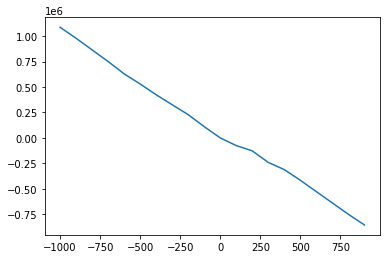

In [44]:
plt.plot(range(-1000, 1000, 100), profits)
plt.show()

Answer: Supposing the expected change in retention for raising and lowering poeple income ranging between USD1000 with incremental of USD100. The results explicitly show that in order to maximize the company's profit together with lowering retention the company should pay as LESS as possible - a cut of USD1000 in income lowers number of retention by 16 people with positive company's profit generation relative to raising income.